# <div align = center>التّأكّد من سلامة الأوراق النّقديّة

<hr>

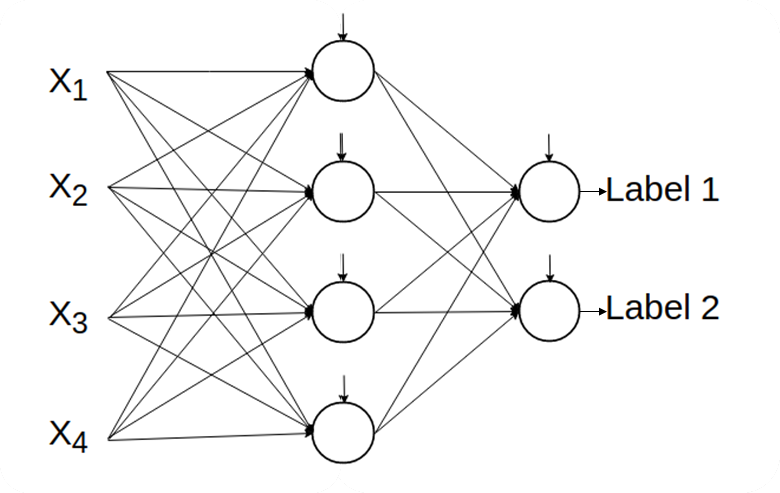

<hr>

# I.    HEADERS (المكتبات)

# II.   DATA (البيانات)

# III. GRAPH (الهيكل)

# IV. SESSION (التطبيق)

<hr>

# I - Headers

## I - 1 Librairies

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import pandas as pan
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


## I - 2 Initialization

In [2]:
# Learning rate
alpha = 0.01

# Number of interations
epoch=10000

# Step
Display_Step = 1000

# II - Data

## II - 1 Loading Data

In [3]:
data = pan.read_csv('data/money.csv')

## II - 2 Data Summary

In [4]:
data.describe()

,X1,X2,X3,X4,Label1,Label2
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606,0.555394
std,2.842763,5.869047,4.310030,2.101013,0.497103,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000,1.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000,1.000000


## II - 3 Display Data

In [5]:
data.head(7)

,X1,X2,X3,X4,Label1,Label2
0,-0.025314,-0.17383,-0.11339,1.21980,1,0
1,5.807000,5.00970,-2.23840,0.43878,0,1
2,-2.434900,-9.24970,8.99220,-0.50001,1,0
3,-1.693600,2.78520,-2.18350,-1.92760,1,0
4,0.636550,5.20220,-5.21590,-6.12110,1,0
5,3.384800,3.26740,0.90967,0.25128,0,1
6,0.004054,0.62905,-0.64121,0.75817,1,0


## II-4 Split Training Data into input and output

In [6]:
X=data.loc[:, ['X1', 'X2', 'X3', 'X4']].values
Y=data.loc[:, ["Label1", "Label2"]].values

## II-5 Split Training Data into Training set and Test set

### II-5-A Training Set

In [7]:
x_input=data.loc[0:1000, ['X1', 'X2', 'X3', 'X4']].values
y_input=data.loc[0:1000, ["Label1", "Label2"]].values

### II-5-B Test Set

In [8]:
x_test=data.loc[1001:len(data), ['X1', 'X2', 'X3', 'X4']].values
y_test=data.loc[1001:len(data), ["Label1", "Label2"]].values

# III - Graph

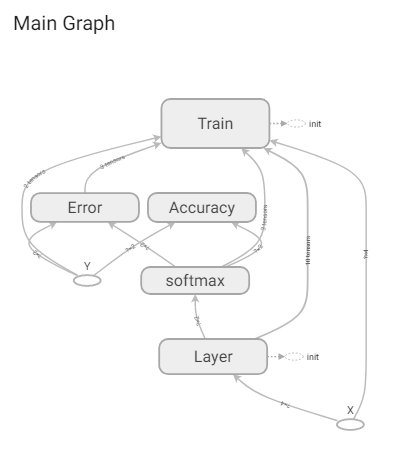

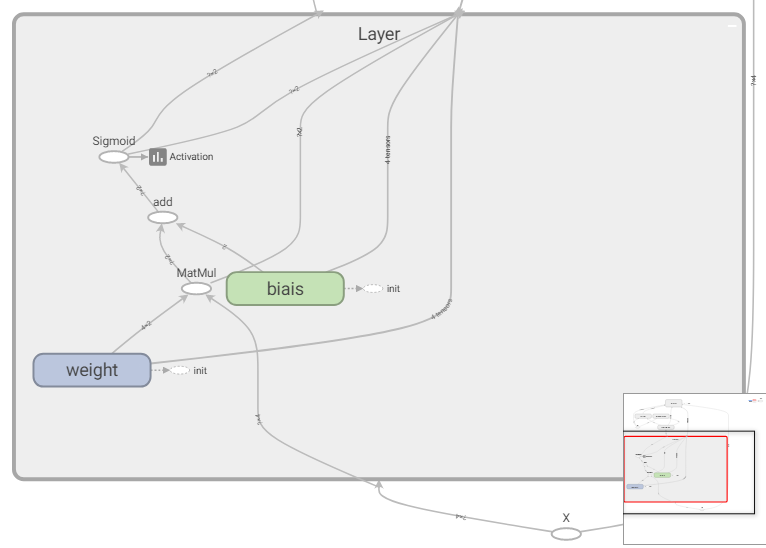

## III-1 placeholders (input has 4 features and output has 2 classes)

In [9]:
x_inp=tf.placeholder(tf.float32,shape=[None, 4])
y_inp=tf.placeholder(tf.float32,shape=[None, 2])

## III-2 Variables. (#weight and bias)

In [10]:
W1=tf.Variable(tf.random_normal([4,4]))
b1=tf.Variable(tf.random_normal([4]))

W2=tf.Variable(tf.random_normal([4,2]))
b2=tf.Variable(tf.random_normal([2]))

## III-3 Model (One Hidden Layer & SoftMax Function)

In [11]:
z1 = tf.matmul(x_inp, W1) + b1
a1 = tf.nn.sigmoid(z1)

z2 = tf.matmul(a1, W2) + b2
a2 = tf.nn.sigmoid(z2)

y = tf.nn.softmax(a2)

## III-4 Loss function. (Cross Entropy)

In [12]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_inp * tf.log(y), reduction_indices=[1]))

## III-5 Optimiser. 

In [13]:
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cross_entropy)

## III-6 Calculating accuracy of our model . 

In [14]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_inp,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# VI- Session

## VI-1 Start Session

In [15]:
sess = tf.Session()

## VI-2 Initialising variables

In [16]:
init = tf.global_variables_initializer()
sess.run(init)

## VI-3 Training

In [17]:
for step in range(epoch):
   _, c = sess.run([optimizer,cross_entropy], feed_dict={x_inp: x_input, y_inp: y_input})

   if step%Display_Step==0 :
       print (step,':', c)

0 : 0.66489935
1000 : 0.6287894
2000 : 0.58115834
3000 : 0.5197315
4000 : 0.47294977
5000 : 0.44076324
6000 : 0.41825172
7000 : 0.4017268
8000 : 0.38981107
9000 : 0.3808685


## VI-4 Accuracy

In [18]:
print (sess.run(accuracy,feed_dict={x_inp: x_test, y_inp:y_test}))

0.99191374
